# Baby Names

The Social Security Administration records the name of every baby born in the United States each year. They provide lists of baby names and their counts. [You can learn more about this data set here](https://dlsun.github.io/pods/data/names/).

## Exercise 0

Read in the data for the year that you were born. Some starter code is provided for you below. Note that the data files do not contain column names, so you have to specify them yourself using `names=`.

How many babies with your name were born in the U.S. in the same year as you? (Even if you have a rare name, you might be surprised!)

In [2]:
# YOUR CODE HERE
import pandas as pd

data_dir = "http://dlsun.github.io/pods/data/names/"
df_1990 = pd.read_csv(data_dir + "yob1990.txt",
                        header=None,
                        names=["Name", "Sex", "Count"])
df_1990

,Name,Sex,Count
0,Jessica,F,46470
1,Ashley,F,45553
2,Brittany,F,36534
3,Amanda,F,34405
4,Samantha,F,25865
...,...,...,...
24710,Zeus,M,5
24711,Ziyad,M,5
24712,Zoilo,M,5
24713,Zoran,M,5


In [3]:
df_1990[df_1990["Name"] == "Karon"]

,Name,Sex,Count
6275,Karon,F,14
16755,Karon,M,56


## Exercise 1

Use the data for the year you were born from above. Now, read in the data for 2020. Which male/female names increased/decreased in popularity the most?

_Hint:_ To do this, you will need to join the two datasets. But on what primary key? Take a look at the potential arguments to `.merge()` [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).

In [4]:
df_2020 = pd.read_csv(data_dir + "yob2020.txt",
                        header=None,
                        names=["Name", "Sex", "Count"])
df_2020

,Name,Sex,Count
0,Olivia,F,17641
1,Emma,F,15656
2,Ava,F,13160
3,Charlotte,F,13065
4,Sophia,F,13036
...,...,...,...
31448,Zykell,M,5
31449,Zylus,M,5
31450,Zymari,M,5
31451,Zyn,M,5


In [5]:
# join the two datasets on name and sex
df_merged = pd.merge(df_1990, df_2020, on=("Name", "Sex"), suffixes=("_1990", "_2020"))
df_merged

,Name,Sex,Count_1990,Count_2020
0,Jessica,F,46470,777
1,Ashley,F,45553,1796
2,Brittany,F,36534,264
3,Amanda,F,34405,690
4,Samantha,F,25865,2945
...,...,...,...,...
12199,Zephan,M,5,13
12200,Zeus,M,5,159
12201,Ziyad,M,5,53
12202,Zoran,M,5,17


In [6]:
# calcuate the change in count from 1990 to 2020
import numpy as np

df_merged["Change"] = np.abs(df_merged["Count_2020"] - df_merged["Count_1990"])
df_merged.sort_values("Change", ascending=False).head(10)

,Name,Sex,Count_1990,Count_2020,Change
6529,Michael,M,65275,9783,55492
6530,Christopher,M,52331,6174,46157
0,Jessica,F,46470,777,45693
1,Ashley,F,45553,1796,43757
6532,Joshua,M,43216,5976,37240
6531,Matthew,M,44794,8105,36689
2,Brittany,F,36534,264,36270
3,Amanda,F,34405,690,33715
6537,Justin,M,30635,2296,28339
6535,Andrew,M,33653,6036,27617


## Exercise 2

A "unisex name" is a name that is commonly used for any sex. Propose a definition of "unisex name" that you can calculate using this data.

What was the most common unisex name in 2020?

_Hint:_ Although this exercise only involves one dataset, it can be elegantly solved using joins!

In [7]:
# cacluate the total number of unique names 2020
names_total_count_2020 = df_2020.groupby(["Name"])["Count"].sum().reset_index().sort_values("Count", ascending=False)
names_total_count_2020

,Name,Count
17292,Liam,19809
21035,Noah,18670
21427,Olivia,17653
8846,Emma,15674
21423,Oliver,14257
...,...,...
22063,Promisee,5
22059,Priyanshi,5
22051,Prisila,5
28755,Zyran,5


In [8]:
# joint the names_count_2020 with df_2020 to find most common unisex names
df_2020_merged = pd.merge(df_2020, names_total_count_2020, on="Name", suffixes=("", "_Total"))
df_2020_merged

,Name,Sex,Count,Count_Total
0,Olivia,F,17641,17653
1,Emma,F,15656,15674
2,Ava,F,13160,13171
3,Charlotte,F,13065,13071
4,Sophia,F,13036,13047
...,...,...,...,...
31448,Zykell,M,5,5
31449,Zylus,M,5,5
31450,Zymari,M,5,5
31451,Zyn,M,5,5


In [9]:
# calculate the sex ratio of each name
df_2020_merged["Sex_Ratio"] = df_2020_merged["Count"] / df_2020_merged["Count_Total"]
df_2020_merged.sort_values("Sex_Ratio").head(10)

,Name,Sex,Count,Count_Total,Sex_Ratio
28252,Charlotte,M,6,13071,0.000459
28077,Amelia,M,6,12773,0.000470
12873,Lucas,F,7,11351,0.000617
24342,Olivia,M,12,17653,0.000680
28228,Camila,M,6,8154,0.000736
27286,Evelyn,M,7,9497,0.000737
31105,Scarlett,M,5,6507,0.000768
14392,Luke,F,6,7766,0.000773
13184,Sebastian,F,7,8996,0.000778
30951,Penelope,M,5,6136,0.000815


In [10]:
# get the most common unisex name
# (define the unisex name as those with sex_ratio between 0.4 and 0.6)
unisex_names_2020 = df_2020_merged[(df_2020_merged["Sex_Ratio"] > 0.4) & (df_2020_merged["Sex_Ratio"] < 0.6)]
unisex_names_2020.sort_values("Count_Total", ascending=False).head(10)

,Name,Sex,Count,Count_Total,Sex_Ratio
17650,Charlie,M,1868,4096,0.456055
121,Charlie,F,2228,4096,0.543945
17655,Blake,M,1808,3126,0.578375
219,Blake,F,1318,3126,0.421625
17713,Emerson,M,1275,3061,0.416531
154,Emerson,F,1786,3061,0.583469
285,Phoenix,F,1109,2628,0.421994
17684,Phoenix,M,1519,2628,0.578006
17751,Finley,M,1086,2525,0.430099
200,Finley,F,1439,2525,0.569901


## Exercise 3

Make a plot illustrating the popularity of your name evey year from 1981 to 2020. (If you have a rare name that does not appear in the data set, choose a friend's name.)

_Hint:_ You will have to join 40 datasets together! Use a `for` loop to join them one at a time.

In [27]:
starting_year = 1981
ending_year = 2020

df_vivian = pd.DataFrame()

for year in range(starting_year, ending_year + 1):
    df_vivian_year = pd.read_csv(data_dir + f"yob{year}.txt",
                                header=None,
                                names=["Name", "Sex", f"Count_{year}"])
    if df_vivian.empty:
        df_vivian = df_vivian_year[df_vivian_year["Name"] == "Vivian"]
    else:
        df_vivian = pd.merge(df_vivian, df_vivian_year[df_vivian_year["Name"] == "Vivian"], on=["Name", "Sex"], suffixes=("", f"_{year}"))

df_vivian

,Name,Sex,Count_1981,Count_1982,Count_1983,Count_1984,Count_1985,Count_1986,Count_1987,Count_1988,...,Count_2011,Count_2012,Count_2013,Count_2014,Count_2015,Count_2016,Count_2017,Count_2018,Count_2019,Count_2020
0,Vivian,F,352,392,411,411,405,442,426,428,...,2021,2261,2650,3062,3201,3140,3023,2956,2928,2697


In [31]:
# create dataframe for plotting
df_vivian_trend = pd.DataFrame()

# create a year and count column
df_vivian_trend["Year"] = list(range(starting_year, ending_year + 1))
df_vivian_trend["Count"] = df_vivian.drop(columns=["Name", "Sex"]).values.flatten()

df_vivian_trend

,Year,Count
0,1981,352
1,1982,392
2,1983,411
3,1984,411
4,1985,405
5,1986,442
6,1987,426
7,1988,428
8,1989,466
9,1990,552


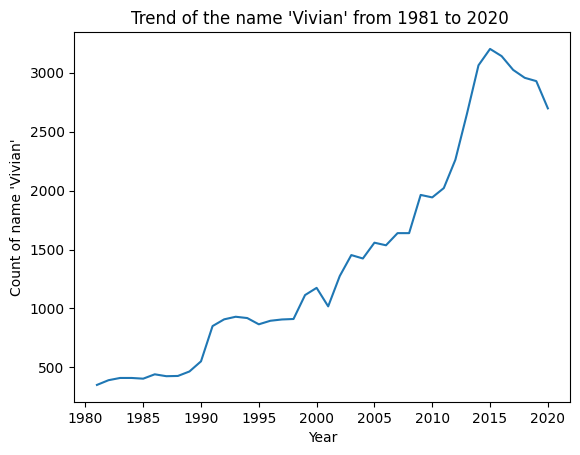

In [32]:
import matplotlib.pyplot as plt

# create a line plot
plt.plot(df_vivian_trend["Year"], df_vivian_trend["Count"])
plt.xlabel("Year")
plt.ylabel("Count of name 'Vivian'")
plt.title("Trend of the name 'Vivian' from 1981 to 2020 ")
plt.show()  